In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import os
import re
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeremychua/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jeremychua/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:

# Specify the path to the directory containing the data
data_directory = '../50.021-ai-event-detection/data'

# Construct the absolute path to the JSONL file
jsonl_path = os.path.join(data_directory, 'train.json')

# Read the content of the JSONL file
with open(jsonl_path, 'r', encoding='utf-8') as file:
    json_content = file.read()

# Wrap the JSON content in a StringIO object
json_io = StringIO(json_content)

# Read the JSONL content from StringIO object
df = pd.read_json(json_io, lines=True)

# Display the DataFrame
print(df.head())


                                     title                                id  \
0  2006 Pangandaran earthquake and tsunami  8307a6b61b84d4eea42c1dd5e6e2cdba   
1             Battle of Santa Clara (1927)  387fe1dfe55067eb29e1fd4116d37af3   
2              Siege of Pondicherry (1793)  268c4763208c87ed7ebf55565c274d23   
3                        Battle of Leuthen  c95e68565081126b5c949117e423695a   
4           Glasgow St Enoch rail accident  3bec0b60c0940c5e46ee2cfc9504df92   

                                             content  \
0  [{'sentence': 'The 2006 Pangandaran earthquake...   
1  [{'sentence': 'The Battle of Santa Clara took ...   
2  [{'sentence': '"For other sieges with this nam...   
3  [{'sentence': 'The Battle of Leuthen was fough...   
4  [{'sentence': 'The Glasgow St Enoch rail accid...   

                                              events  \
0  [{'id': '40b3b20bc2eeb6b163538b82c1379ead', 't...   
1  [{'id': '966f55ccc3fc199e066929414c392266', 't...   
2  [{'id': 'f2

In [3]:
# shape of the dataset
print(df.shape)
# total number of unique categories
print("Unique categories:",df['title'].nunique())
print("-------------------------------------------------")
# information about metadata
df.info()

(2913, 5)
Unique categories: 2913
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913 entries, 0 to 2912
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              2913 non-null   object
 1   id                 2913 non-null   object
 2   content            2913 non-null   object
 3   events             2913 non-null   object
 4   negative_triggers  2913 non-null   object
dtypes: object(5)
memory usage: 113.9+ KB


In [4]:
# general descrption of dataset
df.describe().style.set_properties(**{'background-color': '#F0F0F0',
                                    'color': '#222222',
                                    'border': '1.5px  solid black'})

In [5]:
# drop irrelevant columns
df['type'] = df['events'].apply(lambda x: x[0]['type'] if x else None)
new_df = df[['title', 'type']]
new_df.head()

,title,type
0,2006 Pangandaran earthquake and tsunami,Know
1,Battle of Santa Clara (1927),Receiving
2,Siege of Pondicherry (1793),Expressing_publicly
3,Battle of Leuthen,Surrendering
4,Glasgow St Enoch rail accident,Killing


In [6]:
print(new_df)

                                        title                 type
0     2006 Pangandaran earthquake and tsunami                 Know
1                Battle of Santa Clara (1927)            Receiving
2                 Siege of Pondicherry (1793)  Expressing_publicly
3                           Battle of Leuthen         Surrendering
4              Glasgow St Enoch rail accident              Killing
...                                       ...                  ...
2908           1979 Football League Cup Final          Competition
2909                   K-1 Premium Dynamite!!        Process_start
2910                       2002 Hebron ambush             Becoming
2911       Minneapolis general strike of 1934        Process_start
2912                      Spanair Flight 5022          Catastrophe

[2913 rows x 2 columns]


In [7]:
print(len(new_df['type'].unique()))

142


/Users/jeremychua/opt/anaconda3/envs/three_nine/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremychua/opt/anaconda3/envs/three_nine/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremychua/opt/anaconda3/envs/three_nine/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


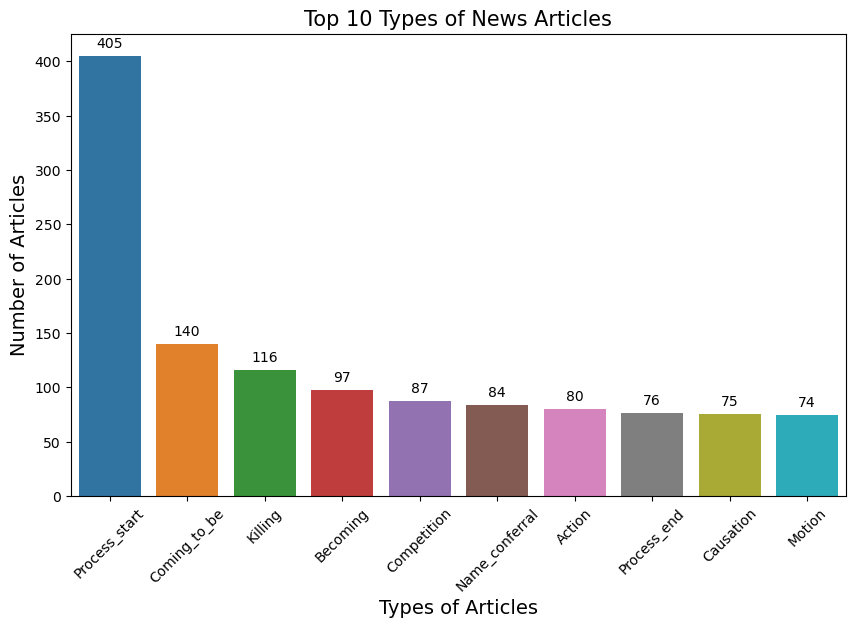

In [8]:
# Get the top 10 repeated occurrences of the 'type' column
top_10_types = df['type'].value_counts().head(10)

# Visualize top 10 types of news articles
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_types.index, y=top_10_types.values)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.title("Top 10 Types of News Articles", size=15)
plt.xlabel("Types of Articles", size=14)
plt.ylabel("Number of Articles", size=14)
plt.xticks(rotation=45)
plt.show()

In [9]:
new_df = new_df["title"]
new_df.to_csv('data/test/stage_train.csv', index=False)